In [54]:
from qiskit import QuantumCircuit, Aer, assemble, transpile
import numpy as np
from math import pi
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

In [55]:
def inverse_qft(qc,n):
    for i in range(n//2):
      qc.swap(i, n-1-i)
    for j in range(n):
        for m in range(j):
            qc.cp(-pi/2**(j-m), m, j)
        qc.h(j)

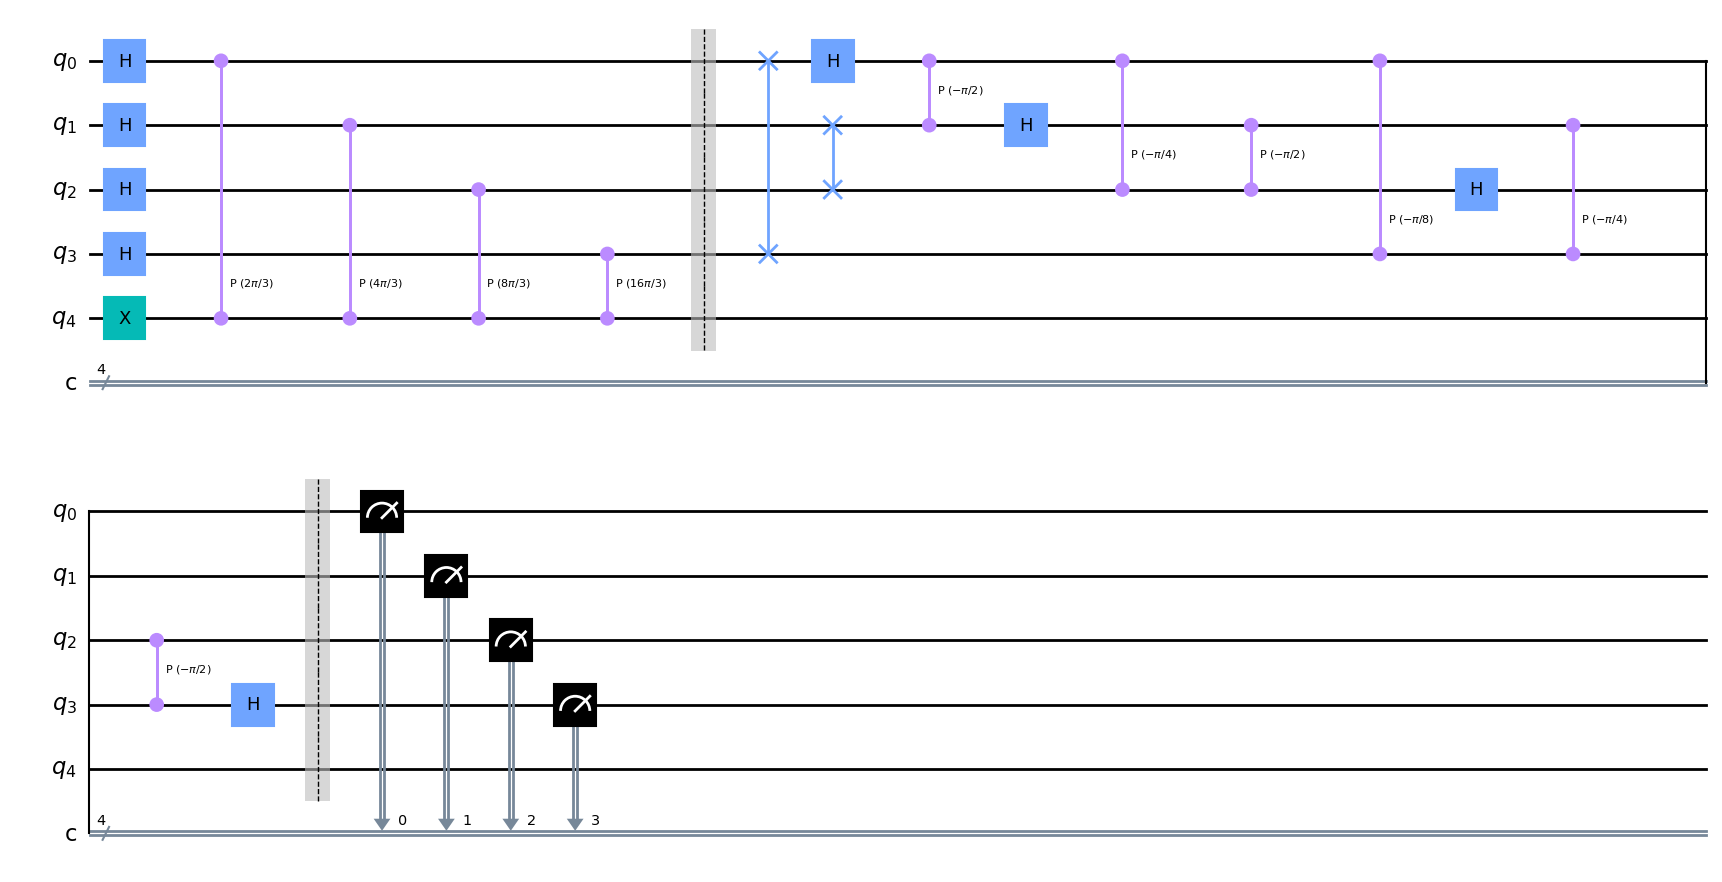

In [56]:
angle = 2*pi*(1/3)
n = 4
qc = QuantumCircuit(n+1, n)
for i in range(n):
    qc.h(i)
qc.x(n)

for i in range(n):
        qc.cp(angle*(2**(i)), n, i)

qc.barrier()

inverse_qft(qc, n)

qc.barrier()
for i in range(n):
      qc.measure(i, i)
qc.draw('mpl')


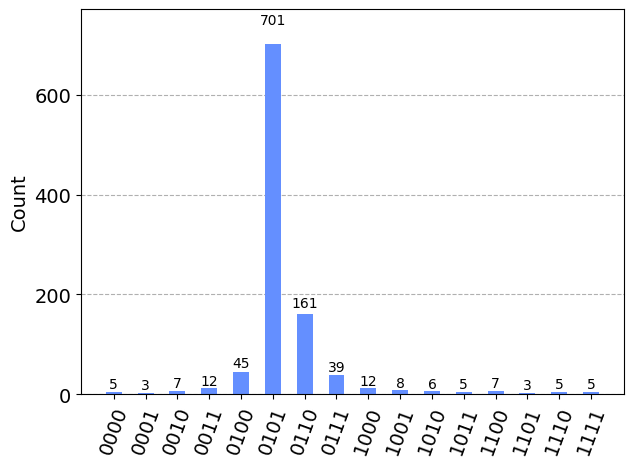

In [57]:
sim = Aer.get_backend('aer_simulator')
qc_t = transpile(qc, sim)
results = sim.run(qc_t).result()
plot_histogram(results.get_counts())

Peak is at 0101 and 2nd highest value is at 0110.


Thus our phase must lie between these two values -5/16 and 6/16


Indeed 0.3125 ( 5/16 ) < 0.333 (1/3, the value of phase) < 0.375 ( 6/16 )
